In [1]:
#https://github.com/deepcharles/ruptures

In [7]:
import import_ipynb
import matplotlib.pyplot as plt  # To visualize
import ruptures as rpt
from sklearn.linear_model import LinearRegression

from BabiloniaDataAnalytics import BabiloniaDataAnalytics

bda = BabiloniaDataAnalytics('../../server/app/config.json')
linear_regressor = LinearRegression()  # create object for the class
ONE_HOUR=120

In [8]:
bda.plot_node_moisture()
# Range: 1608951601 – 1609037999 / MUX2 => level shift

In [9]:
signal = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608951600) & (bda.NODE_MOISTURE_DATA.index < 1609037999)]['MUX2'].to_frame().rolling(ONE_HOUR).mean().dropna() # 120 ~ 1 hour
signal.reset_index(level=0, inplace=True)

In [10]:
X = signal.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = signal.iloc[:, 1].values.reshape(-1, 1) 

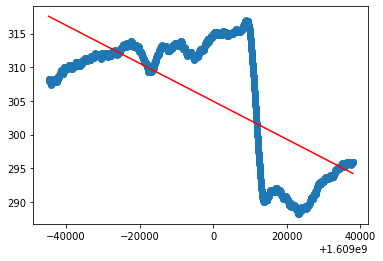

In [11]:
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [12]:
linear_regressor.score(X,Y)

0.489329870946681

In [13]:
linear_regressor.coef_

array([[-0.00028234]])

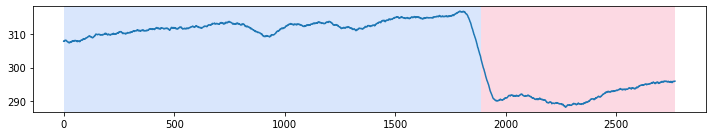

In [14]:
#https://centre-borelli.github.io/ruptures-docs/code-reference/detection/kernelcpd-reference/#ruptures.detection.kernelcpd.KernelCPD
pelt = rpt.KernelCPD(kernel="linear", min_size=ONE_HOUR).fit_predict(Y, n_bkps=1)
# display
rpt.display(Y, pelt)
plt.show()

In [15]:
X_filtered = X[pelt[0]+ONE_HOUR:]
Y_filtered = Y[pelt[0]+ONE_HOUR:]

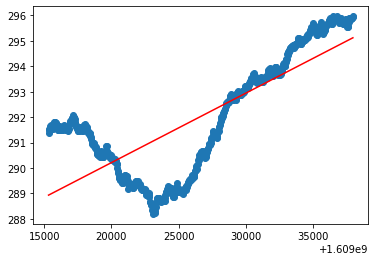

In [16]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_filtered, Y_filtered)  # perform linear regression
Y_pred = linear_regressor.predict(X_filtered)  # make predictions
plt.scatter(X_filtered, Y_filtered)
plt.plot(X_filtered, Y_pred, color='red')
plt.show()

In [17]:
linear_regressor.score(X_filtered,Y_filtered)

0.590357741157948

In [18]:
linear_regressor.coef_

array([[0.00027325]])